In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
year = 2022
gp_round = 7
ses = 'Q'

In [3]:
driver_1 = 'LEC'
driver_2 = 'PER'

In [4]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '11', '1', '4', '63', '14', '44', '5', '31', '22', '77', '20', '3', '47', '23', '10', '18', '6', '24']


In [5]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True


In [6]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0.0,0 days 00:01:12.569000,0 days 00:01:11.864000,0 days 00:01:11.376000,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,0.0,0 days 00:01:12.616000,0 days 00:01:12.074000,0 days 00:01:11.601000,NaT,,0.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,3.0,0.0,0 days 00:01:13.004000,0 days 00:01:11.954000,0 days 00:01:11.629000,NaT,,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,4.0,0.0,0 days 00:01:12.993000,0 days 00:01:12.117000,0 days 00:01:11.666000,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,5.0,0.0,0 days 00:01:12.927000,0 days 00:01:12.266000,0 days 00:01:11.849000,NaT,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,16.0,0.0,0 days 00:01:13.611000,NaT,NaT,NaT,,0.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,17.0,0.0,0 days 00:01:13.660000,NaT,NaT,NaT,,0.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,18.0,0.0,0 days 00:01:13.678000,NaT,NaT,NaT,,0.0
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,19.0,0.0,0 days 00:01:14.403000,NaT,NaT,NaT,,0.0


In [7]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-05-28 14:54:33.496,0 days 01:09:33.102000,,1318.349722,0 days 00:00:00,11191,276,7,100,False,12,interpolation,0.017999,0.000005,OnTrack,-7665,-6549,500
3,2022-05-28 14:54:33.625,0 days 01:09:33.231000,,1318.349722,0 days 00:00:00.129000,11248,278,7,100,False,12,car,9.986667,0.003051,OnTrack,-7671,-6469,501
4,2022-05-28 14:54:33.641,0 days 01:09:33.247000,,1318.349722,0 days 00:00:00.145000,11241,279,7,100,False,12,pos,11.227293,0.003430,OnTrack,-7672,-6458,502
5,2022-05-28 14:54:33.785,0 days 01:09:33.391000,5,1318.349722,0 days 00:00:00.289000,11235,280,7,100,False,12,car,22.431111,0.006853,OnTrack,-7678,-6346,502
6,2022-05-28 14:54:33.801,0 days 01:09:33.407000,5,1312.716389,0 days 00:00:00.305000,11291,281,7,100,False,12,pos,23.679449,0.007234,OnTrack,-7679,-6334,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2022-05-28 14:55:44.386,0 days 01:10:43.992000,5,1172.469444,0 days 00:01:10.890000,10801,268,7,100,False,12,car,3230.847778,0.987003,OnTrack,-7638,-6962,502
533,2022-05-28 14:55:44.420,0 days 01:10:44.026000,5,1167.595370,0 days 00:01:10.924000,10801,269,7,100,False,12,pos,3233.403542,0.987784,OnTrack,-7642,-6921,502
534,2022-05-28 14:55:44.601,0 days 01:10:44.207000,5,1162.721296,0 days 00:01:11.105000,10801,270,7,100,False,12,pos,3247.071040,0.991959,OnTrack,-7660,-6653,502
535,2022-05-28 14:55:44.666,0 days 01:10:44.272000,5,1157.847222,0 days 00:01:11.170000,10801,272,7,100,False,12,car,3252.003333,0.993466,OnTrack,-7665,-6572,502


In [8]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:59.917000,27.6,37.0,1004.0,False,55.3,344,0.8
1,0 days 00:01:59.913000,27.6,37.0,1004.0,False,55.3,3,0.8
2,0 days 00:02:59.934000,27.6,38.0,1004.0,False,54.8,328,0.6
3,0 days 00:03:59.929000,27.6,39.0,1004.0,False,54.8,313,1.0
4,0 days 00:04:59.925000,27.5,39.0,1004.2,False,53.0,303,1.1
...,...,...,...,...,...,...,...,...
76,0 days 01:17:00.275000,26.5,42.0,1003.2,False,45.6,0,0.8
77,0 days 01:18:00.300000,26.6,42.0,1003.2,False,45.3,0,0.3
78,0 days 01:19:00.304000,26.7,44.0,1003.0,False,44.7,176,0.5
79,0 days 01:20:00.309000,26.6,43.0,1003.2,False,44.5,0,1.0


In [9]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[10:-3])
        
    return t_list_str

In [10]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [11]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])
# t_list_lec = format_time(t_lec)
# t_list_msc = format_time(t_msc)

In [12]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [13]:
hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
fig.show()

In [14]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Gear", row=2, col=1)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
fig.show()

In [15]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 00:20:38.316000,16,0 days 00:01:14.892000,2,1,NaT,NaT,0 days 00:00:20.134000,0 days 00:00:35.102000,0 days 00:00:19.656000,...,False,SOFT,2.0,True,0 days 00:19:23.424000,Ferrari,LEC,1,True,2022-05-28 14:04:23.818
3,0 days 00:23:36.898000,16,0 days 00:01:12.939000,4,1,NaT,NaT,0 days 00:00:19.351000,0 days 00:00:34.263000,0 days 00:00:19.325000,...,False,SOFT,4.0,True,0 days 00:22:23.959000,Ferrari,LEC,1,True,2022-05-28 14:07:24.353
5,0 days 00:26:29.828000,16,0 days 00:01:12.569000,6,1,NaT,NaT,0 days 00:00:19.174000,0 days 00:00:34.060000,0 days 00:00:19.335000,...,False,SOFT,6.0,True,0 days 00:25:17.259000,Ferrari,LEC,1,True,2022-05-28 14:10:17.653
10,0 days 00:48:20.036000,16,0 days 00:01:12.092000,11,2,NaT,NaT,0 days 00:00:19.141000,0 days 00:00:33.913000,0 days 00:00:19.038000,...,False,SOFT,3.0,True,0 days 00:47:07.944000,Ferrari,LEC,1,True,2022-05-28 14:32:08.338
13,0 days 00:52:41.040000,16,0 days 00:01:11.864000,14,2,NaT,NaT,0 days 00:00:18.907000,0 days 00:00:33.928000,0 days 00:00:19.029000,...,False,SOFT,6.0,True,0 days 00:51:29.176000,Ferrari,LEC,1,True,2022-05-28 14:36:29.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0 days 00:21:38.754000,6,0 days 00:01:16.358000,4,1,NaT,NaT,0 days 00:00:20.459000,0 days 00:00:35.906000,0 days 00:00:19.993000,...,False,SOFT,4.0,True,0 days 00:20:22.396000,Williams,LAT,1,True,2022-05-28 14:05:22.790
389,0 days 00:24:32.164000,6,0 days 00:01:15.638000,6,1,NaT,NaT,0 days 00:00:19.998000,0 days 00:00:35.597000,0 days 00:00:20.043000,...,False,SOFT,6.0,True,0 days 00:23:16.526000,Williams,LAT,1,True,2022-05-28 14:08:16.920
392,0 days 00:29:46.443000,6,0 days 00:01:14.570000,9,2,NaT,NaT,0 days 00:00:19.660000,0 days 00:00:35.180000,0 days 00:00:19.730000,...,False,SOFT,3.0,True,0 days 00:28:31.873000,Williams,LAT,1,True,2022-05-28 14:13:32.267
395,0 days 00:37:59.345000,6,0 days 00:01:14.403000,12,3,NaT,NaT,0 days 00:00:19.904000,0 days 00:00:35.010000,0 days 00:00:19.489000,...,True,SOFT,3.0,True,0 days 00:36:44.942000,Williams,LAT,1,True,2022-05-28 14:21:45.336


In [16]:
lap_1 = fastest_driver_1.telemetry
lap_1

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-05-28 14:54:33.496,0 days 01:09:33.102000,,1318.349722,0 days 00:00:00,11191,276,7,100,False,12,interpolation,0.017999,0.000005,OnTrack,-7665,-6549,500
3,2022-05-28 14:54:33.625,0 days 01:09:33.231000,,1318.349722,0 days 00:00:00.129000,11248,278,7,100,False,12,car,9.986667,0.003051,OnTrack,-7671,-6469,501
4,2022-05-28 14:54:33.641,0 days 01:09:33.247000,,1318.349722,0 days 00:00:00.145000,11241,279,7,100,False,12,pos,11.227293,0.003430,OnTrack,-7672,-6458,502
5,2022-05-28 14:54:33.785,0 days 01:09:33.391000,5,1318.349722,0 days 00:00:00.289000,11235,280,7,100,False,12,car,22.431111,0.006853,OnTrack,-7678,-6346,502
6,2022-05-28 14:54:33.801,0 days 01:09:33.407000,5,1312.716389,0 days 00:00:00.305000,11291,281,7,100,False,12,pos,23.679449,0.007234,OnTrack,-7679,-6334,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2022-05-28 14:55:44.386,0 days 01:10:43.992000,5,1172.469444,0 days 00:01:10.890000,10801,268,7,100,False,12,car,3230.847778,0.987003,OnTrack,-7638,-6962,502
533,2022-05-28 14:55:44.420,0 days 01:10:44.026000,5,1167.595370,0 days 00:01:10.924000,10801,269,7,100,False,12,pos,3233.403542,0.987784,OnTrack,-7642,-6921,502
534,2022-05-28 14:55:44.601,0 days 01:10:44.207000,5,1162.721296,0 days 00:01:11.105000,10801,270,7,100,False,12,pos,3247.071040,0.991959,OnTrack,-7660,-6653,502
535,2022-05-28 14:55:44.666,0 days 01:10:44.272000,5,1157.847222,0 days 00:01:11.170000,10801,272,7,100,False,12,car,3252.003333,0.993466,OnTrack,-7665,-6572,502


In [17]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^']
}

In [18]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
px = 1/plt.rcParams['figure.dpi']

In [19]:
start_x

-7665

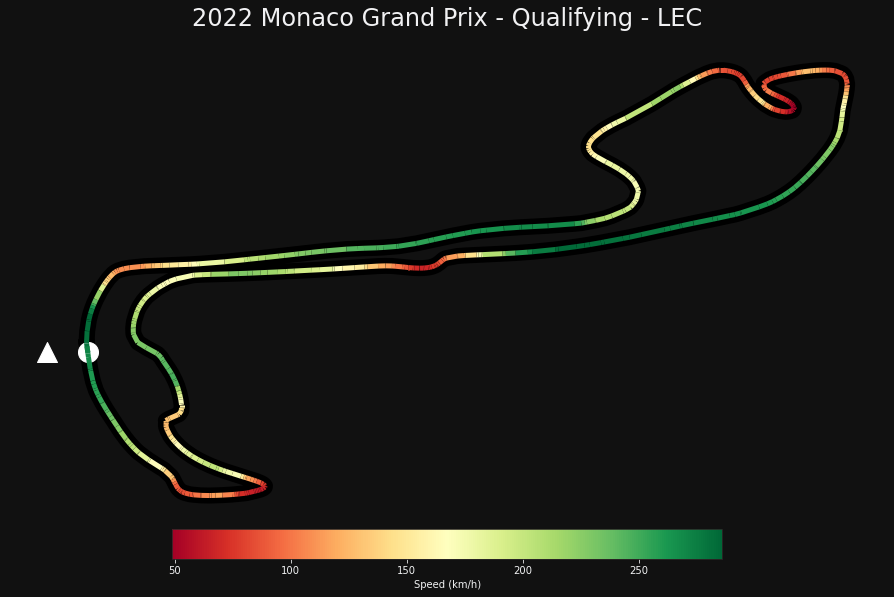

In [20]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(1100*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

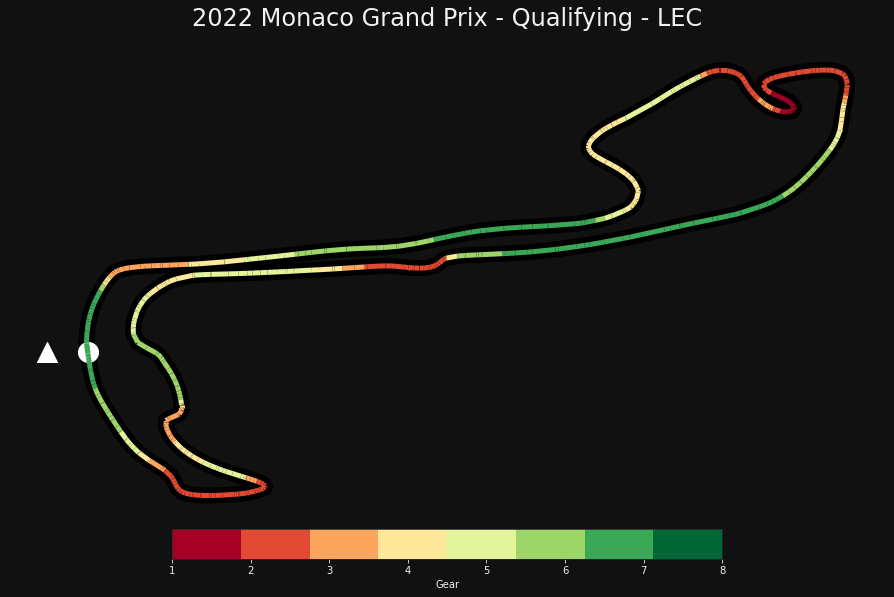

In [21]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(1100*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [22]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

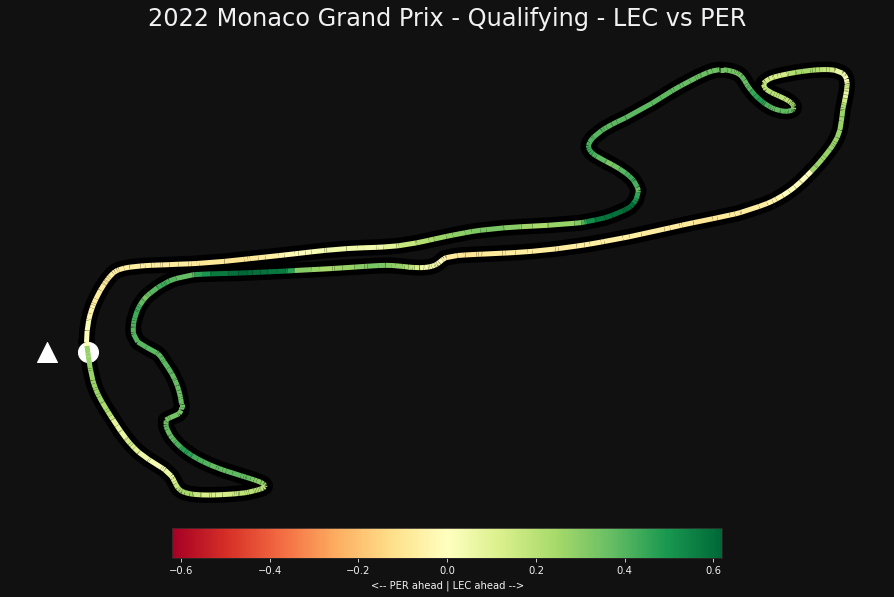

In [23]:
# Determine boundaries for the colorbar
vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(1100*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(vmin, vmax)
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(delta_time)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()